In [80]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import math

In [81]:
df = pd.read_csv("E:\\Datasets\\NIFTY.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0
...,...,...,...,...,...,...,...
3881,2023-06-06,18600.800781,18622.750000,18531.599609,18599.000000,18599.000000,220800.0
3882,2023-06-07,18665.599609,18738.949219,18636.000000,18726.400391,18726.400391,260100.0
3883,2023-06-08,18725.349609,18777.900391,18615.599609,18634.550781,18634.550781,286500.0
3884,2023-06-09,18655.900391,18676.650391,18555.400391,18563.400391,18563.400391,221800.0


In [82]:
df.isna().sum()

Date          0
Open         30
High         30
Low          30
Close        30
Adj Close    30
Volume       30
dtype: int64

In [83]:
df = df.dropna()

In [84]:
df.shape

(3856, 7)

In [85]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

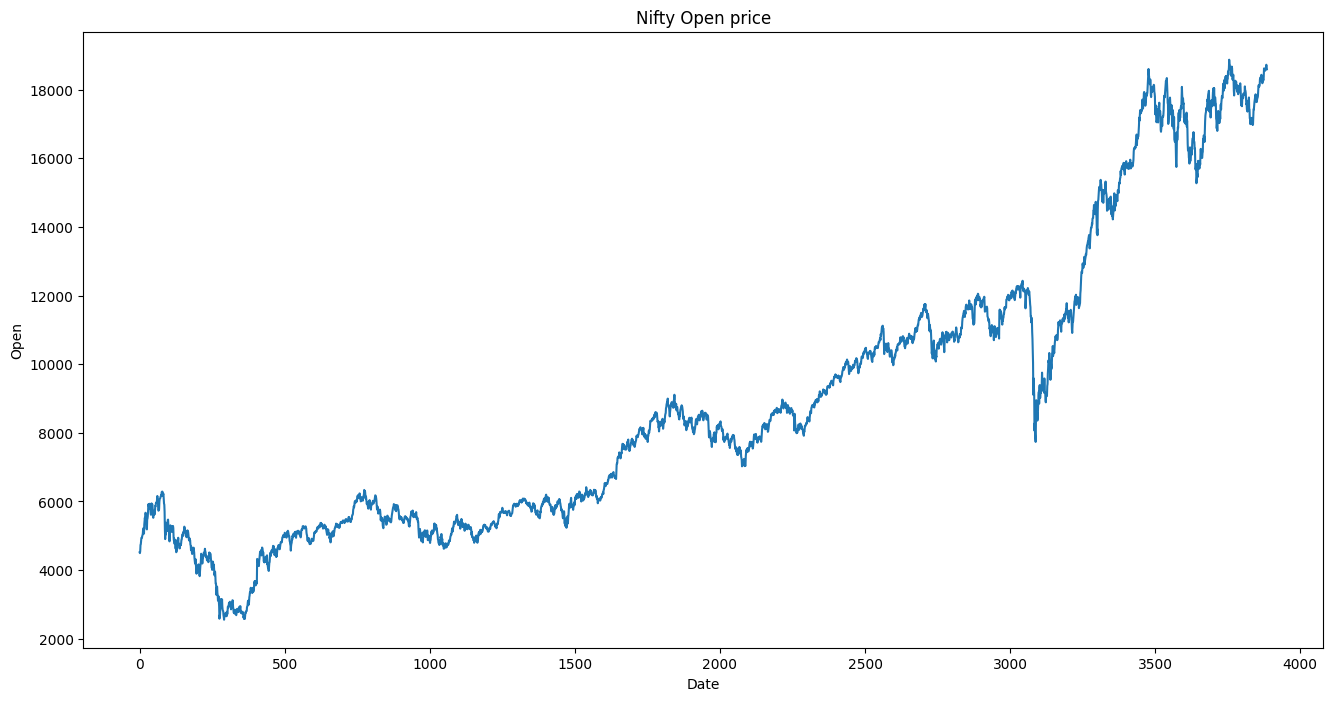

In [86]:
plt.figure(figsize=(16,8))
plt.title('Nifty Open price')
plt.plot(df['Open'])
plt.xlabel('Date')
plt.ylabel('Open')
plt.show()

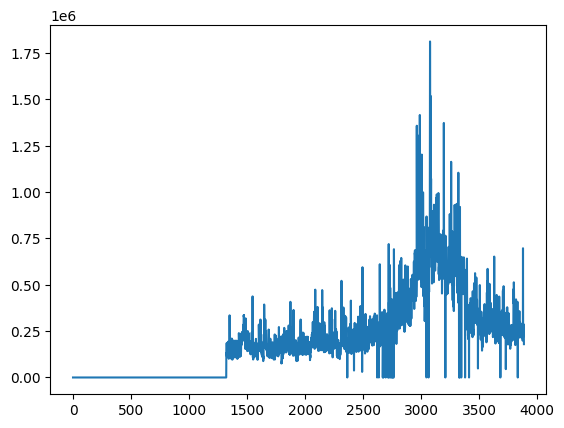

In [87]:
volume = df['Volume']
plt.plot(volume)

In [97]:
open = df.filter(['Open'])
open_ds = open.values
training_data_len = math.ceil(len(open_ds)*0.75)
training_data_len

2892

In [98]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_ods = scaler.fit_transform(np.array(open_ds))
scaled_ods

array([[0.12040741],
       [0.11891522],
       [0.12235612],
       ...,
       [0.99101627],
       [0.98676037],
       [0.98303147]])

In [99]:
#Create Training Dataset

train_ods = scaled_ods[0:training_data_len, : ]

#Split data into xtrain and ytrain

x_train = []
y_train = []

for i in range(60,len(train_ods)):
    x_train.append(train_ods[i-60:i, 0])
    y_train.append(train_ods[i, 0])

In [100]:
#Create Testing Dataset
test_ods = scaled_ods[training_data_len-60: , ]
#Split data into xtest and ytest

x_test = []
y_test = scaled_ods[training_data_len:, :]

for i in range(60, len(test_ods)):
    x_test.append(test_ods[i-60:i, 0])

In [101]:
x_train, y_train, x_test = np.array(x_train), np.array(y_train), np.array(x_test)
x_train.shape, y_train.shape, x_test.shape

((2832, 60), (2832,), (964, 60))

In [102]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_train.shape, x_test.shape

((2832, 60, 1), (964, 60, 1))

In [15]:
#old
len(scaled_ods), len(ods)

(3856, 3856)

In [16]:
#old
train_ods, test_ods = train_test_split(scaled_ods, test_size = 0.2)
train_ods,test_ods

(array([[0.17762213],
        [0.22357653],
        [0.38790075],
        ...,
        [0.84171199],
        [0.18686634],
        [0.55391324]]),
 array([[0.34024582],
        [0.00726482],
        [0.14035733],
        [0.16389217],
        [0.32606852],
        [0.16522811],
        [0.12376863],
        [0.13444679],
        [0.4952615 ],
        [0.89486385],
        [0.18049925],
        [0.81014937],
        [0.1176712 ],
        [0.18744237],
        [0.15123466],
        [0.22448042],
        [0.48401344],
        [0.34326694],
        [0.56343934],
        [0.87154953],
        [0.50514912],
        [0.94859781],
        [0.81465961],
        [0.15793262],
        [0.1684484 ],
        [0.59186438],
        [0.35324956],
        [0.32102513],
        [0.36562216],
        [0.14616981],
        [0.35103119],
        [0.34308005],
        [0.14427011],
        [0.88937922],
        [0.15425886],
        [0.11642416],
        [0.10654875],
        [0.2170195 ],
        [0.184730

In [17]:
#old
def create_ds(dataset, time_step):
    xtrain, ytrain = [], []
    for i in range (len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        xtrain.append(a)
        ytrain.append(dataset[i+time_step,0])
    return np.array(xtrain), np.array(ytrain)

In [18]:
#old
time_step = 60
x_train,y_train = create_ds(train_ods,time_step)
x_test, y_test = create_ds(test_ods, time_step)

In [22]:
#old
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
x_test.shape, x_train.shape

((711, 60, 1), (3023, 60, 1))

In [103]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(150, return_sequences=True, input_shape = (x_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='linear')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 60, 150)           91200     
                                                                 
 dropout_10 (Dropout)        (None, 60, 150)           0         
                                                                 
 lstm_16 (LSTM)              (None, 60, 100)           100400    
                                                                 
 dropout_11 (Dropout)        (None, 60, 100)           0         
                                                                 
 lstm_17 (LSTM)              (None, 50)                30200     
                                                                 
 dense_10 (Dense)            (None, 128)               6528      
                                                                 
 dense_11 (Dense)            (None, 1)                

In [104]:
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
)

In [105]:
history = model.fit(x_train, y_train, epochs=1, batch_size=1)

2832/2832 [==============================] - 130s 43ms/step - loss: 8.7853e-04


In [106]:
predictions = model.predict(x_test)

31/31 [==============================] - 3s 43ms/step


In [107]:
predictions

array([[0.57043535],
       [0.5699914 ],
       [0.57003677],
       [0.5694942 ],
       [0.56809694],
       [0.56585795],
       [0.5630085 ],
       [0.55979735],
       [0.5567932 ],
       [0.55398566],
       [0.5508652 ],
       [0.5475964 ],
       [0.543994  ],
       [0.5401601 ],
       [0.5361175 ],
       [0.53264195],
       [0.5298415 ],
       [0.5283946 ],
       [0.52843904],
       [0.5291626 ],
       [0.5301963 ],
       [0.53142506],
       [0.53256744],
       [0.53331774],
       [0.53323007],
       [0.53165305],
       [0.5298633 ],
       [0.528816  ],
       [0.52871597],
       [0.5290452 ],
       [0.5294647 ],
       [0.52970386],
       [0.52910423],
       [0.52792615],
       [0.52654344],
       [0.525405  ],
       [0.52499276],
       [0.52541965],
       [0.52624166],
       [0.527182  ],
       [0.528068  ],
       [0.5283572 ],
       [0.52790076],
       [0.52651614],
       [0.52721053],
       [0.53062063],
       [0.53602844],
       [0.542

In [108]:
predictions = scaler.inverse_transform(predictions)
predictions

array([[11862.164 ],
       [11854.919 ],
       [11855.659 ],
       [11846.806 ],
       [11824.005 ],
       [11787.468 ],
       [11740.97  ],
       [11688.569 ],
       [11639.547 ],
       [11593.731 ],
       [11542.811 ],
       [11489.47  ],
       [11430.685 ],
       [11368.122 ],
       [11302.153 ],
       [11245.4375],
       [11199.739 ],
       [11176.128 ],
       [11176.854 ],
       [11188.66  ],
       [11205.529 ],
       [11225.58  ],
       [11244.222 ],
       [11256.466 ],
       [11255.035 ],
       [11229.301 ],
       [11200.095 ],
       [11183.005 ],
       [11181.372 ],
       [11186.745 ],
       [11193.591 ],
       [11197.493 ],
       [11187.708 ],
       [11168.483 ],
       [11145.92  ],
       [11127.343 ],
       [11120.616 ],
       [11127.582 ],
       [11140.996 ],
       [11156.34  ],
       [11170.799 ],
       [11175.518 ],
       [11168.069 ],
       [11145.475 ],
       [11156.806 ],
       [11212.453 ],
       [11300.7   ],
       [11398

In [109]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

14825.666072791937

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14024\3528175408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


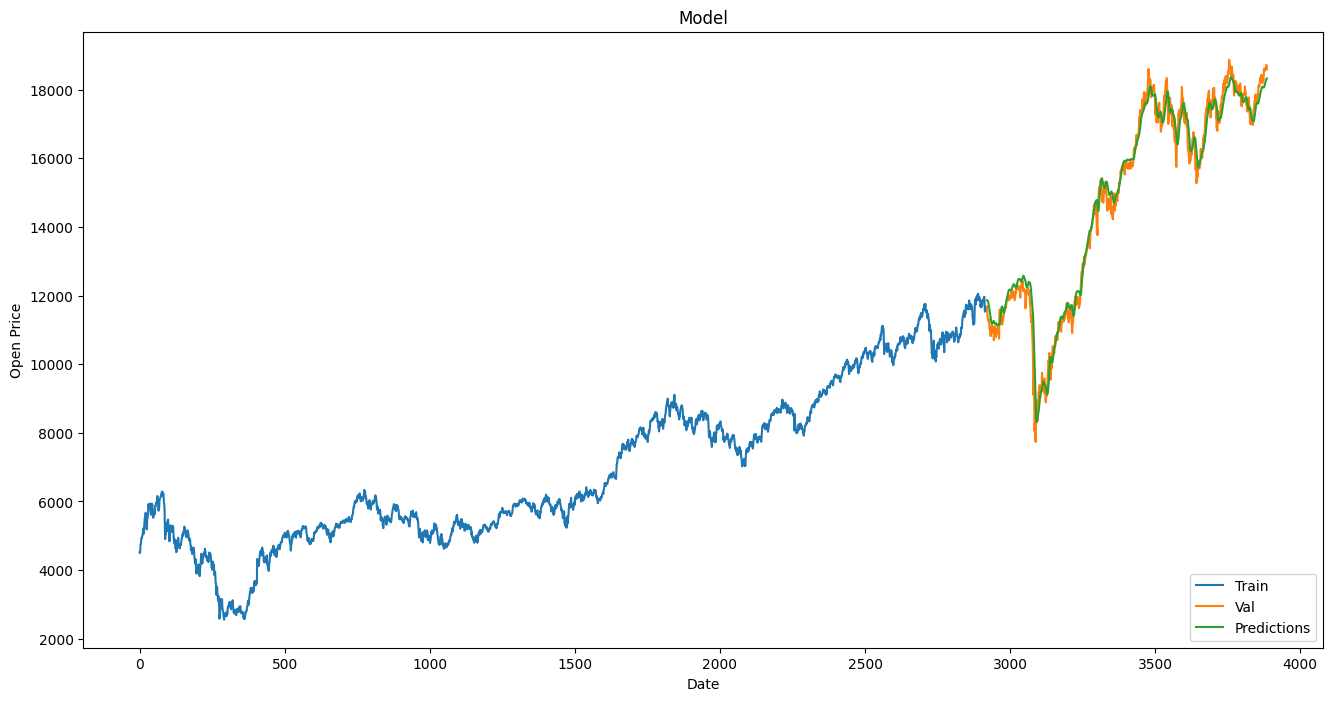

In [110]:
#Plot the Data

train = open[:training_data_len]
valid = open[training_data_len:]
valid['Predictions'] = predictions

#visualize

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.plot(train['Open'])
plt.plot(valid[['Open','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()